# Relativer Wachstum Sommerfest

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import enum
import common.chat
import common.live

In [2]:
#config
#reload(sys)
#sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
#%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

#define show days
class ComparisonType:
    week, week_no_weekend, weekday = range(3)

COMPARISION = ComparisonType.week_no_weekend
SHOWS = [{
    'date': datetime.datetime(2015, 8, 28),
    'name': 'Sommerfest 2015'
}, {
    'date': datetime.datetime(2016, 9, 30),
    'name': 'Sommerfest 2016'
}]
SPAN_LEFT = 2
SPAN_RIGHT = 0

## Chat Daten

In [3]:
#load chat data
chat = common.chat.load(CHAT_DATA_DIRECTORY)

#create additional column
chat['day'] = chat.index.strftime('%Y-%m-%d')

chat

,username,message,day
datetime,,,
2015-08-05 02:00:09,tadloss,!sendeplan,2015-08-05
2015-08-05 02:00:09,moobot,Angaben zum aktuellen Programm findet Ihr: Auf...,2015-08-05
2015-08-05 02:00:10,dersendeplan,@tadloss (01:00) Blue Estate >> (02:30) Darkes...,2015-08-05
2015-08-05 02:00:17,dedalos_stormbring,"@Gunvolf, Brav. Kappa",2015-08-05
2015-08-05 02:00:18,unclesreefermadness,ist da nicht schmatzen gäng und ein kompliment,2015-08-05
2015-08-05 02:00:29,unclesreefermadness,+ing,2015-08-05
2015-08-05 02:00:29,nutsdo,Unclesreefermadness ich glaube schon,2015-08-05
2015-08-05 02:00:32,gunvolf,@nutsdo du bist odstun,2015-08-05
2015-08-05 02:00:36,unclesreefermadness,könnte auch ein klischee sein^^,2015-08-05


In [4]:
#filter chat data by date
chatFiltered = chat

#group chat data by date
chatGrouped = chatFiltered.groupby('day')

#count messages
chatMessages = chatGrouped.size().to_frame('messages')

#adjust data type
chatMessages = chatMessages.set_index(pd.to_datetime(chatMessages.index, format='%Y-%m-%d'))

#resample
chatMessages = chatMessages.resample('1D').mean().fillna(float('NaN'))

chatMessages

,messages
day,
2015-08-05,74921.0
2015-08-06,59003.0
2015-08-07,71043.0
2015-08-08,64954.0
2015-08-09,30041.0
2015-08-10,19528.0
2015-08-11,32905.0
2015-08-12,35466.0
2015-08-13,35096.0


In [5]:
#filter chat data by date
chatFiltered = chat

#group messages by date
chatGrouped = chatFiltered.groupby('day')

#count (unique) users
chatParticipants = chatGrouped.agg({'username': pd.Series.nunique})
chatParticipants.columns = ['participants']

#adjust data type
chatParticipants = chatParticipants.set_index(pd.to_datetime(chatParticipants.index, format='%Y-%m-%d'))

#resample
chatParticipants = chatParticipants.resample('1D').mean().fillna(float('NaN'))

chatParticipants

,participants
day,
2015-08-05,8634.0
2015-08-06,6565.0
2015-08-07,6982.0
2015-08-08,6173.0
2015-08-09,3868.0
2015-08-10,2895.0
2015-08-11,4122.0
2015-08-12,4232.0
2015-08-13,3980.0


## Live Daten
___

In [6]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.strftime('%Y-%m-%d')

In [7]:
#filter live data by date
liveFiltered = live

#group live data by date
liveGrouped = liveFiltered.groupby('day')

#calculate mean for each day
liveMean = liveGrouped.apply(lambda group: group['viewers'].mean())
liveMean = liveMean.to_frame('viewers')

#adjust data type
liveMean = liveMean.set_index(pd.to_datetime(liveMean.index, format='%Y-%m-%d'))

liveMean

,viewers
day,
2015-01-15,39952.809155
2015-01-16,15516.815972
2015-01-17,10779.276811
2015-01-18,9721.064583
2015-01-19,9326.186453
2015-01-20,10493.045326
2015-01-21,12030.206944
2015-01-22,11261.631944
2015-01-23,10431.520139


## Auswertung 
___


Sommerfest 2015

=== data ===
            participants  messages      viewers
2015-08-10        2895.0   19528.0  3324.626389
2015-08-11        4122.0   32905.0  4055.067361
2015-08-12        4232.0   35466.0  4570.020833
2015-08-13        3980.0   35096.0  4245.817361
2015-08-14        3506.0   30459.0  3789.061806
2015-08-17        3731.0   31426.0  3681.306250
2015-08-18        3621.0   33824.0  4172.979861
2015-08-19        5806.0   42838.0  4941.304861
2015-08-20        4267.0   38265.0  4618.811024
2015-08-21        3631.0   31230.0  3626.663194
2015-08-24        3553.0   33966.0  3790.618056
2015-08-25        3837.0   34056.0  4044.736806
2015-08-26        4069.0   36666.0  4342.487500
2015-08-27        3319.0   28220.0  3915.967361
2015-08-28        4954.0   51123.0  5614.568750

=== mean ===
participants     3968.200000
messages        34337.866667
viewers          4182.269161
dtype: float64

=== growth ===
            participants   messages    viewers
2015-08-10    -27.0450

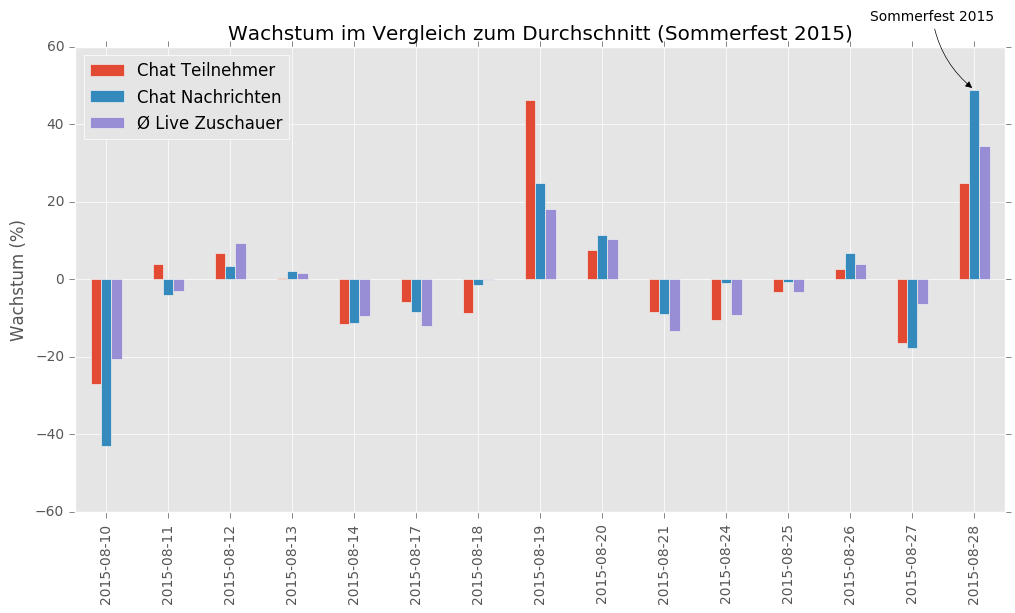


Sommerfest 2016

=== data ===
            participants  messages      viewers
2016-09-12        2540.0   19450.0  2465.762500
2016-09-13        4464.0   34076.0  2776.420139
2016-09-14        2936.0   27158.0  2551.800000
2016-09-15        2968.0   29157.0  2758.358333
2016-09-16        3531.0   41372.0  3386.458333
2016-09-19        2633.0   22966.0  2735.050694
2016-09-20        3716.0   28772.0  2724.169444
2016-09-21        3449.0   30379.0  2509.134722
2016-09-22        2431.0   23233.0  2677.770833
2016-09-23        1823.0   17102.0  2290.979167
2016-09-26        2568.0   21443.0  2483.983333
2016-09-27        4574.0   39320.0  2632.225000
2016-09-28        2938.0   30331.0  2492.128472
2016-09-29        2236.0   21853.0  2530.177778
2016-09-30        3134.0   31231.0  2778.894444

=== mean ===
participants     3062.733333
messages        27856.200000
viewers          2652.887546
dtype: float64

=== growth ===
            participants   messages    viewers
2016-09-12    -17.0675

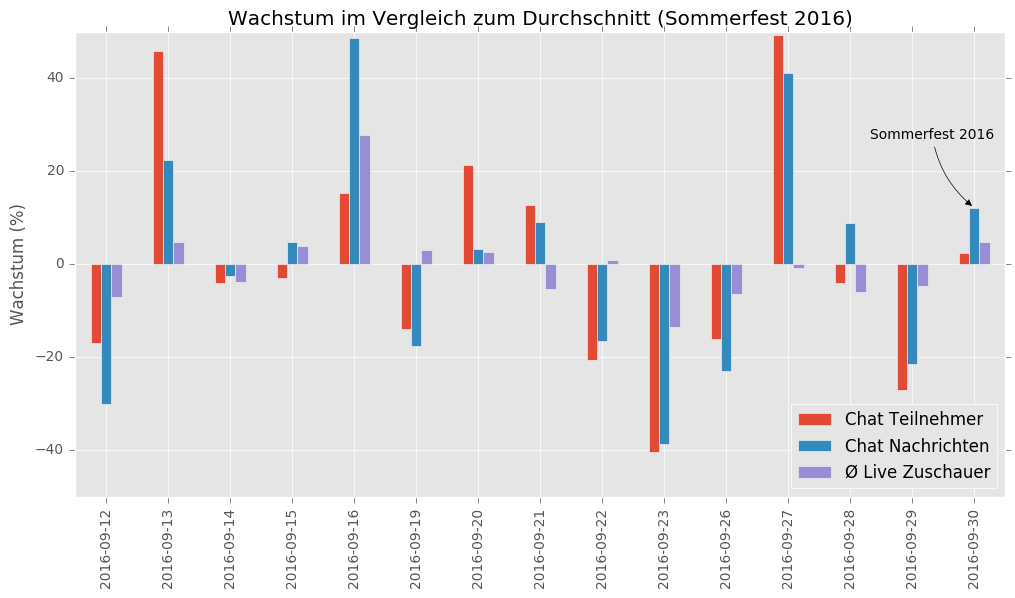

In [8]:
#join data
joinedData = chatParticipants.join(chatMessages).join(liveMean)

#create additional columns
joinedData['weekday'] = joinedData.index.dayofweek

for show in SHOWS:
    #filter by date
    startDay = show['date'] + datetime.timedelta(days=-show['date'].weekday(), weeks=-SPAN_LEFT)
    endDay = show['date'] + datetime.timedelta(days=6 - show['date'].weekday(), weeks=SPAN_RIGHT)
    joinedDataFiltered = joinedData.loc[startDay : endDay]

    #filter by comparision type
    if COMPARISION == ComparisonType.week:
        #no additional filter necessary
        pass
    elif COMPARISION == ComparisonType.week_no_weekend:
        workingDays = range(0,5)
        joinedDataFiltered = joinedDataFiltered[joinedDataFiltered['weekday'].isin(workingDays)]
    elif COMPARISION == ComparisonType.weekday:
        joinedDataFiltered = joinedDataFiltered[joinedDataFiltered['weekday'] == show['date'].weekday()]

        #adjust data type
    joinedDataFiltered = joinedDataFiltered.set_index(joinedDataFiltered.index.date)

    #remove columns
    joinedDataFiltered.drop('weekday', axis=1, inplace=True)

    #calculate mean
    joinedDataMean = joinedDataFiltered.mean()

    #calculate growth
    joinedDataGrowth = 100 * ((joinedDataFiltered / joinedDataMean) - 1)

    #output
    print('\n====================================================')
    print(show['name'])
    print('\n=== data ===')
    print(joinedDataFiltered)
    print('\n=== mean ===')
    print(joinedDataMean)
    print('\n=== growth ===')
    print(joinedDataGrowth)

    sys.stdout.flush()

    plot = joinedDataGrowth.plot(kind='bar', figsize=(12, 6), title='Wachstum im Vergleich zum Durchschnitt (%s)' % show['name'])
    plot.set_xlabel('')
    plot.set_ylabel('Wachstum (%)')

    date = show['date'].date()
    datapoint = joinedDataGrowth.loc[date]
    x = joinedDataGrowth.index.get_loc(date)
    y = datapoint.max()
    xText = 5 * len(show['name'])
    plot.annotate(show['name'], 
                  xy=(x, y), xycoords='data', 
                  xytext=(-xText, 50), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=0.2',
                                  linewidth = 0.5,
                                  color = 'black'))

    legend = plot.legend(loc=0)
    legend.get_texts()[0].set_text('Chat Teilnehmer')
    legend.get_texts()[1].set_text('Chat Nachrichten')
    legend.get_texts()[2].set_text('Ø Live Zuschauer')

    plt.show()